<a href="https://colab.research.google.com/github/LaloGarces/Data-Preprocessing-Machine-Learning-Template/blob/main/Data_Preprocessing_Template_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Template for Machine Learning @ [Lalo Garces](https://www.linkedin.com/in/eduardogarces1//)

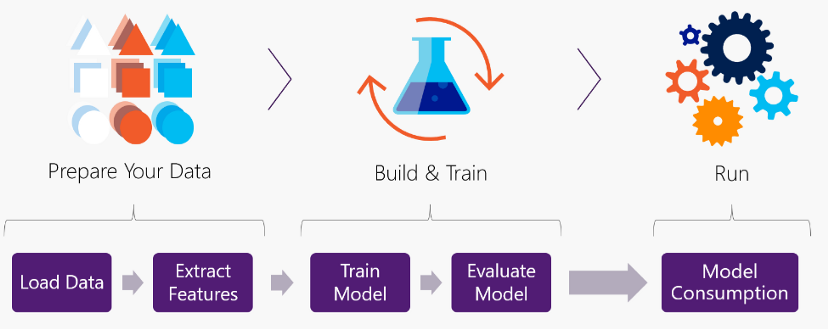

## Hello guys, this is a basic or in some cases, the must to have data preprocessing steps before run our Machine Learning Algorithms. 

The most used and basic data preprocessing Toolkit are: 

* Import the libraries
* Import the dataset
* Missing data (Solution blank spaces within your data)
* Encode categorical data
* Split the dataset in *Training set and Test set*
* Feature Scaling

**Use it with your own data, hope you enjoy it!** 😊

# 1. Importing Libraries

In [ ]:
#This is the basics libraries to run simple ML Models, of course in Deep Learning you need more than these ones. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk 

# 2. Importing the Dataset

I'm using a public Dataset from Kaggle Dataset--> "Diamonds"

https://www.kaggle.com/datasets/shivam2503/diamonds?resource=download

In [ ]:
#To import a dataset from Colab, we need to import the next library

from google.colab import drive
drive.mount("/content/gdrive") # <-- This is to let Colab access to your Google Drive

Mounted at /content/gdrive


In [ ]:
#The next code is to select your dataset from your computer

from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


In [ ]:
#Finally read your dataset

dataset = pd.read_csv("diamonds.csv")

In [ ]:
#Just visualize your dataset and the structure
dataset

,depth,table,x,y,z,carat,cut,color,clarity,price
0,61.5,55.0,3.95,3.98,2.43,0.23,Ideal,E,SI2,326
1,59.8,61.0,3.89,3.84,2.31,0.21,Premium,E,SI1,326
2,56.9,65.0,4.05,4.07,2.31,0.23,Good,E,VS1,327
3,62.4,58.0,4.20,4.23,2.63,0.29,Premium,I,VS2,334
4,63.3,58.0,4.34,4.35,2.75,0.31,Good,J,SI2,335
...,...,...,...,...,...,...,...,...,...,...
53935,60.8,57.0,5.75,5.76,3.50,0.72,Ideal,D,SI1,2757
53936,63.1,55.0,5.69,5.75,3.61,0.72,Good,D,SI1,2757
53937,62.8,60.0,5.66,5.68,3.56,0.70,Very Good,D,SI1,2757
53938,61.0,58.0,6.15,6.12,3.74,0.86,Premium,H,SI2,2757


Ok so let's take a little of theory before move forward. 

Normally, when you use Machine Learning modelling, you need to identify the next variables:

1. Dependent Variable
2. Independent Variable 

* The independent variable is the cause. It's value is independent of other variables in your study.

* The dependent variable is the effect. It's value depends on changes in the independent variable.

In other words, the dependent variable is the variable within your dataset you want to “predict” and the independent variables are the variables that affect your variable to be predicted. 

In [ ]:
#Split the dataset into Independent and Dependent variables
x = dataset.iloc[:, :-1].values   # x --> To all independent variables
y = dataset.iloc[:, -1].values    # y--> To the dependent variable 

In [ ]:
print(x)

[[61.5 55.0 3.95 ... 'Ideal' 'E' 'SI2']
 [59.8 61.0 3.89 ... 'Premium' 'E' 'SI1']
 [56.9 65.0 4.05 ... 'Good' 'E' 'VS1']
 ...
 [62.8 60.0 5.66 ... 'Very Good' 'D' 'SI1']
 [61.0 58.0 6.15 ... 'Premium' 'H' 'SI2']
 [62.2 55.0 5.83 ... 'Ideal' 'D' 'SI2']]


In [ ]:
print(y)

[ 326  326  327 ... 2757 2757 2757]


# 3. Missing data

Ok guys, when you have missing values in your data set, if you run your data like that, the Machine Learning model is going to return you an error, so before run ML models we need to fill those missing values. 

Normally, those missing values are filled with the “mean” of all the values of the column that present missing values. 

If you have missing values run the next code, in the case of this dataset, all the rows are filled. 


In [ ]:
x[:, [6,7,8]]

array([['Ideal', 'E', 'SI2'],
       ['Premium', 'E', 'SI1'],
       ['Good', 'E', 'VS1'],
       ...,
       ['Very Good', 'D', 'SI1'],
       ['Premium', 'H', 'SI2'],
       ['Ideal', 'D', 'SI2']], dtype=object)

In [ ]:
x[:, :5]

array([[61.5, 55.0, 3.95, 3.98, 2.43],
       [59.8, 61.0, 3.89, 3.84, 2.31],
       [56.9, 65.0, 4.05, 4.07, 2.31],
       ...,
       [62.8, 60.0, 5.66, 5.68, 3.56],
       [61.0, 58.0, 6.15, 6.12, 3.74],
       [62.2, 55.0, 5.83, 5.87, 3.64]], dtype=object)

In [ ]:
#I'm going to import the Class "Simple Imputer" from Sklearn to solve the issue of missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')  #--> Using the mean technique.
imputer.fit(x[:, :5]) #--> Important, the mean strategy only works with "numeric values", please exclude all the categorical values
x[:, :5] = imputer.transform(x[:, :5])

In [ ]:
print(x)

[[61.5 55.0 3.95 ... 'Ideal' 'E' 'SI2']
 [59.8 61.0 3.89 ... 'Premium' 'E' 'SI1']
 [56.9 65.0 4.05 ... 'Good' 'E' 'VS1']
 ...
 [62.8 60.0 5.66 ... 'Very Good' 'D' 'SI1']
 [61.0 58.0 6.15 ... 'Premium' 'H' 'SI2']
 [62.2 55.0 5.83 ... 'Ideal' 'D' 'SI2']]


# 4. Encode categorical data

Another important point to consider before run your ML models is converting your categorical data (text values) into numbers. The ML models will don't read categorical data so, those variables need to be converted into numbers. 

In this case, we're going to use a very efficient tool called “One Hot Encoder”, that let convert those categorical values in numerical values without giving any priority based on the numbers provided. 

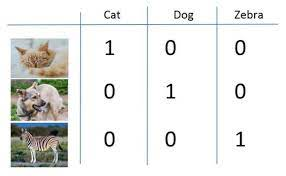

In [ ]:
#Let see the variables of the Dependent Variables (X)
print (x)

[[61.5 55.0 3.95 ... 'Ideal' 'E' 'SI2']
 [59.8 61.0 3.89 ... 'Premium' 'E' 'SI1']
 [56.9 65.0 4.05 ... 'Good' 'E' 'VS1']
 ...
 [62.8 60.0 5.66 ... 'Very Good' 'D' 'SI1']
 [61.0 58.0 6.15 ... 'Premium' 'H' 'SI2']
 [62.2 55.0 5.83 ... 'Ideal' 'D' 'SI2']]


In [ ]:
x[:, [6,7,8]]

array([['Ideal', 'E', 'SI2'],
       ['Premium', 'E', 'SI1'],
       ['Good', 'E', 'VS1'],
       ...,
       ['Very Good', 'D', 'SI1'],
       ['Premium', 'H', 'SI2'],
       ['Ideal', 'D', 'SI2']], dtype=object)

In [ ]:
#Column 6,7 and 8 on x has categorical values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6,7,8])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
#Now all your data is in numerical values
print(x)

[[0.0 0.0 1.0 ... 3.98 2.43 0.23]
 [0.0 0.0 0.0 ... 3.84 2.31 0.21]
 [0.0 1.0 0.0 ... 4.07 2.31 0.23]
 ...
 [0.0 0.0 0.0 ... 5.68 3.56 0.7]
 [0.0 0.0 0.0 ... 6.12 3.74 0.86]
 [0.0 0.0 1.0 ... 5.87 3.64 0.75]]


In [ ]:
#Dummy variables of categorical data were positioned at the beginning of the dataset, extract the NO DUMMY VARIABLES,
#because we're going to use them at the end of the template. 
print(x[:, -5:])

[[55.0 3.95 3.98 2.43 0.23]
 [61.0 3.89 3.84 2.31 0.21]
 [65.0 4.05 4.07 2.31 0.23]
 ...
 [60.0 5.66 5.68 3.56 0.7]
 [58.0 6.15 6.12 3.74 0.86]
 [55.0 5.83 5.87 3.64 0.75]]


# 5. Splitt the data into Training and Test Set

When you train ML models, you need to split the data into 2 new datasets: 

* Training Set: To let your ML model train with the original data
* Test Set: To let your ML model compare it's predictions based in the original dataset.

Normally we use, 20% of your data for test and the other 80% for the training. 

In [ ]:
#Split the original dataset with Sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1) #<-- 0.2 equal to 20% of the test set

# 6. Feature Scaling

### Ok so, what is Feature Scaling?

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

**Here's a great example:**

Imagine you want to make a juice of different fruits, you have an apple and a strawberry. If you want to mix the flavor of both fruits and, to get a very delicious juice, you need to mix the juice of both fruits proportionally and not based in the size of the apple vs strawberry: 


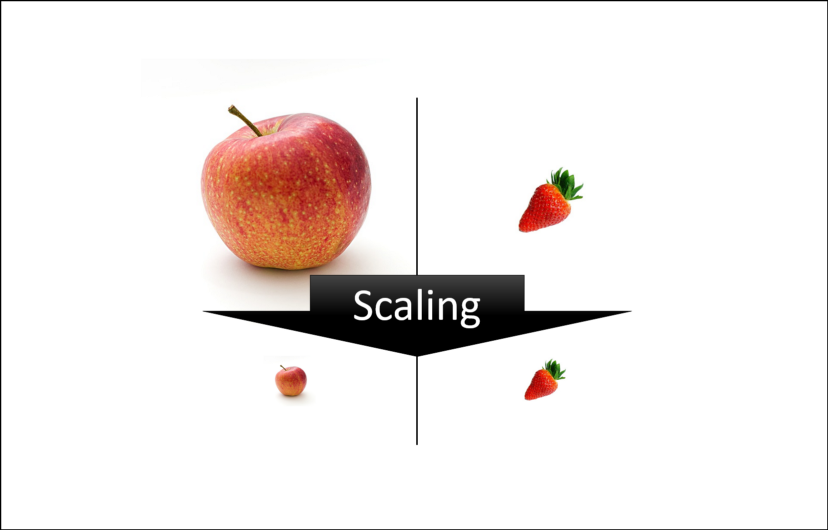

Apple & Strawberry Image Credit: Pixabay

The most common techniques of Feature Scaling are: 

* Normalization
* Standardization

The most used is Standardization working the majority of the time, Normalization is more used when you have a normal distribution is in the majority of your features. 

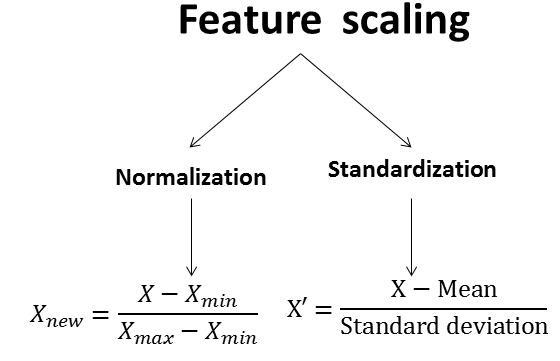

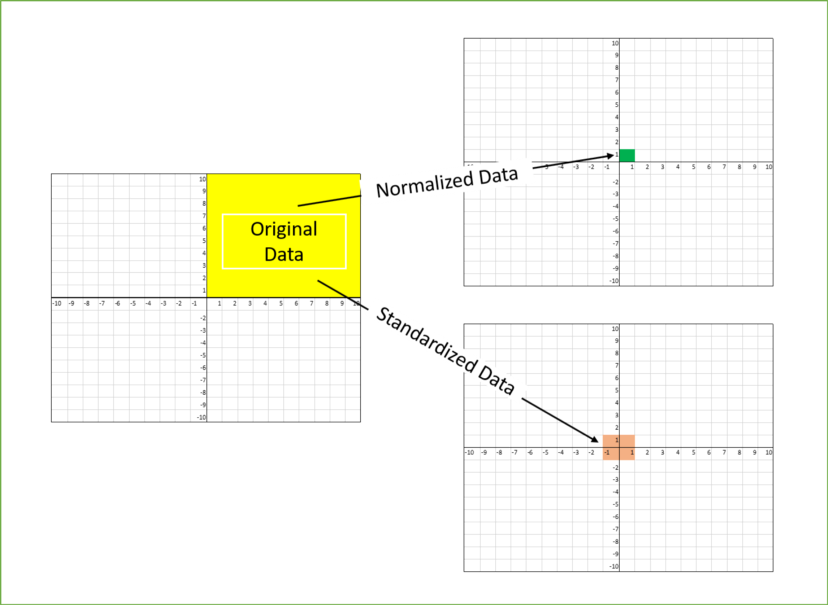

### Why does Feature Scaling is applied "after" the split of training and test set?

Because test set is like new data , never seen before by the ML model, so, we need to preserve that data as new observations. 

Apply feature scaling before the split, we're not letting the test set participate like the future data that is going to come in the future to the model. 

We can obtain **data leakage** that refers to a mistake that is made by the creator of a machine learning model in which information about the target variable is leaking into the input of the model during the training of the model; information that will not be available in the ongoing data that we would like to predict on

In [ ]:
print(x_train.shape)

(43152, 26)


In [ ]:
print(x_train[:, -5:])

[[53.0 4.8 4.77 2.98 0.41]
 [59.0 6.79 6.73 4.09 1.12]
 [56.0 4.83 4.87 2.94 0.42]
 ...
 [63.0 6.05 6.0 3.78 0.91]
 [56.0 6.79 6.82 4.2 1.18]
 [56.0 4.41 4.43 2.69 0.32]]


* It's very important NOT to apply Feature Scaling to Dummy Variables.
* Only we're going to apply the Feature Scaling in x data (training and test) to run the ML model with the same input in both sets.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, -5:] = sc.fit_transform(x_train[:, -5:])
x_test[:, -5:] = sc.fit_transform(x_test[:, -5:])

In [ ]:
x_train

array([[0.0, 0.0, 1.0, ..., -0.8347237860552832, -0.7843750095945493,
        -0.813799387470034],
       [0.0, 0.0, 0.0, ..., 0.8664687633859895, 0.7792563467851878,
        0.6788219831007063],
       [0.0, 0.0, 1.0, ..., -0.7479282478184831, -0.8407220855001255,
        -0.7927765512648123],
       ...,
       [0.0, 0.0, 0.0, ..., 0.23286133425735211, 0.34256650851697285,
        0.2373424227910506],
       [0.0, 0.0, 1.0, ..., 0.9445847477991091, 0.9342108055255227,
        0.804959000332036],
       [0.0, 0.0, 1.0, ..., -1.1298286160604016, -1.1928913099099763,
        -1.0030049133170291]], dtype=object)

In [ ]:
x_test

array([[0.0, 0.0, 1.0, ..., -1.1677141173184944, -1.1710589400444937,
        -1.008606382940875],
       [0.0, 0.0, 1.0, ..., 0.8756833044694281, 0.934635732445516,
        0.8532841819543513],
       [0.0, 0.0, 1.0, ..., -0.1868833548602915, -0.25617090992814495,
        -0.3879761946424662],
       ...,
       [1.0, 0.0, 0.0, ..., -0.2322921864555785, 0.15044599234578765,
        -0.21676786683600865],
       [0.0, 0.0, 0.0, ..., 0.9937462666171746, 0.9491577646695848,
        0.8532841819543513],
       [0.0, 0.0, 1.0, ..., -0.2322921864555785, -0.2126048132559381,
        -0.36657515366665894]], dtype=object)

# Template Summary

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk 

## Importing dataset

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
from google.colab import files
uploaded = files.upload()

In [ ]:
dataset = pd.read_csv("dataset.csv")

## Missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, :])
x[:, :] = imputer.transform(x[:, :])

## Encoding Categorical Data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

## Split the data into Training and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1) 

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,:] = sc.fit_transform(x_train[:, :])
x_test[:, :] = sc.fit_transform(x_test[:, :])